## Learning-Rate Tuning

In [1]:
import os
import sys

# CHANGE LEVELS:
chdir = os.path.dirname(os.getcwd())
sys.path.insert(0, chdir)

# Importing all the modules and functions related to constructing MLP network models

from network.net import Net                   # Net class, base class for constructing MLP networks
from network.layer import Linear              # Linear class, child class of parent class Layer 
from network.loss import CrossEntropyLoss     # CrossEntropyLoss class, child class of parent class Loss
from network.activ import ReLU, LeakyReLU     # ReLU, LeakyReLU classes, child classes of parent class Activation
from network.optim import SGD, Adam           # SGD, Adam classes, child classes of parent class Optimizer

In [2]:
# Importing all the modules and functions related to data processing including loaders for the assignment data

# Process module contains functions relating to data processing:
from network.loader.process import (
    train_test_split,        # Function to split data with chosen ratio, data can be shuffled
    normalize,               # Normalizes data to have mean of zero and unit variance
    standardize,             # Normalizes data to be between range 0-1, i.e. standardizes data
    one_hot,                 # One hot encoding: 100% prob of 2 is [0, 0, 1] with 3 classes
    pca                      # Reduces data to chosen K principal components
) 

# Data module for loading the assignment data
from network.dataset.source import (
    get_data_from_file,   # Loads assignment data from file (must be within main directory)
    get_data_from_url     # Loads assignment data from public GitHub repo that stores data
)

# Data loader module for automating processing of and loading of assignment data based on parameter selections
from network.loader.data_loader import load_train_val_test  # Parameter selections decide method of processing

import numpy as np
import matplotlib.pyplot as pl
import pandas as pd 
import seaborn as sns

# setting random seed
np.random.seed(123)

In [4]:
def plot_results(stats):
    ep, tl, ta, vl, va = stats
    pl.figure(figsize = (10, 7))

    fig, ((ax1, ax2), (ax3, ax4)) = pl.subplots(2, 2)
    fig.suptitle(f'Training Results, best model found @ Epoch {ep}')

    ax1.plot(tl)
    ax1.set_title('Training Loss')

    ax2.plot(vl, 'tab:orange')
    ax2.set_title('Validation Loss')

    ax3.plot(ta, 'tab:green')
    ax3.set_title('Training Accuracy')

    ax4.plot(va, 'tab:red')
    ax4.set_title('Validation Accuracy')
    
    for ax in fig.get_axes():
        ax.label_outer()

    pl.show()

# Note as we are loading data from URL it will take longer than from file.
train_set, valid_set, test_set = load_train_val_test(
    source = "url", method = "standardize", pca_N = 0, n_categories = 10, ratio = 0.2, shuffle = True
)

## Base Model - Default Adam Learning Rate 

In [5]:
mlp = Net(
    optimizer = Adam(
        learning_rate = 0.001  # Default value
    ),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

mlp.add(Linear(128, 1024, dropout=0.4))
mlp.add(ReLU())
mlp.add(Linear(1024, 512, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(512, 64, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(64, 16, dropout=0.2))
mlp.add(ReLU())
mlp.add(Linear(16, 10))  


mlp.set_name("Adam_network")
print(f"{mlp.model_name} is initialized and ready to be trained.")

Adam_network is initialized and ready to be trained.


## Scenario A: lr x 10 ** 1

In [6]:
s10 = Net(
    optimizer = Adam(
        learning_rate = 0.01  # 
    ),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

s10.add(Linear(128, 1024, dropout=0.4))
s10.add(ReLU())
s10.add(Linear(1024, 512, dropout=0.2))
s10.add(ReLU())
s10.add(Linear(512, 64, dropout=0.2))
s10.add(ReLU())
s10.add(Linear(64, 16, dropout=0.2))
s10.add(ReLU())
s10.add(Linear(16, 10))  


s10.set_name("Adam_network_10")
print(f"{s10.model_name} is initialized and ready to be trained.")

Adam_network_10 is initialized and ready to be trained.


### Train and Evaluate Scenario A

In [7]:
s10s = s10.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

  1%|█▍                                                                                                                                           | 1/100 [00:07<11:38,  7.05s/it]

Epoch: 0	Interval Time: 7.0 sec(s)	Training Loss: 1.903595		Training Accuracy: 0.318100
						Validation Loss:1.641534	Validation Accuracy: 0.424800


  6%|████████▍                                                                                                                                    | 6/100 [00:41<10:48,  6.90s/it]

Epoch: 5	Interval Time: 34.4 sec(s)	Training Loss: 1.429581		Training Accuracy: 0.524325
						Validation Loss:1.391677	Validation Accuracy: 0.535100


 11%|███████████████▍                                                                                                                            | 11/100 [01:15<10:10,  6.86s/it]

Epoch: 10	Interval Time: 34.3 sec(s)	Training Loss: 1.311897		Training Accuracy: 0.579750
						Validation Loss:1.337018	Validation Accuracy: 0.559700


 16%|██████████████████████▍                                                                                                                     | 16/100 [01:50<09:38,  6.89s/it]

Epoch: 15	Interval Time: 34.5 sec(s)	Training Loss: 1.250449		Training Accuracy: 0.609925
						Validation Loss:1.312225	Validation Accuracy: 0.574700


 21%|█████████████████████████████▍                                                                                                              | 21/100 [02:24<09:07,  6.93s/it]

Epoch: 20	Interval Time: 34.6 sec(s)	Training Loss: 1.205551		Training Accuracy: 0.635350
						Validation Loss:1.304418	Validation Accuracy: 0.576000


 26%|████████████████████████████████████▍                                                                                                       | 26/100 [03:00<08:39,  7.02s/it]

Epoch: 25	Interval Time: 35.3 sec(s)	Training Loss: 1.171086		Training Accuracy: 0.654625
						Validation Loss:1.289529	Validation Accuracy: 0.588600


 31%|███████████████████████████████████████████▍                                                                                                | 31/100 [03:35<08:09,  7.10s/it]

Epoch: 30	Interval Time: 35.2 sec(s)	Training Loss: 1.142679		Training Accuracy: 0.666775
						Validation Loss:1.296388	Validation Accuracy: 0.589800


 34%|███████████████████████████████████████████████▌                                                                                            | 34/100 [04:03<07:53,  7.17s/it]



Minimum percent change (1e-25%) in training loss not exceeded.

Convergence criteria achieved.
Training completed @ Epoch 34.
Total training time: 4 min 3.9 s

                Best model found @ Epoch 34
                --------------------------------------------
                Training Loss: 1.127680
                Validation Loss: 1.283842
                --------------------------------------------
                Training Accuracy: 0.674900
                Validation Accuracy: 0.593700


Best model 'Adam_network_10' saved in 'model/' directory.


{'tags': ['hide-output']}

<Figure size 720x504 with 0 Axes>

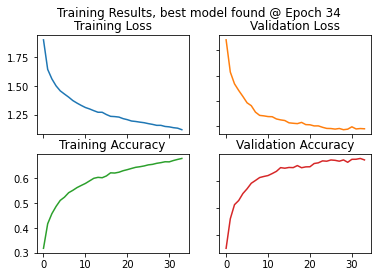

In [8]:
plot_results(s10s)

In [9]:
# Loading best model found:

best_model = Net.load_model("model/" + s10.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

-------------------------------------------
Accuracy on train data: 85.07%
Total Count:  40000
Total Match:  34027
-------------------------------------------
Test Accuracy of	0: 90.25% (3664/4060)
Test Accuracy of	1: 79.40% (3183/4009)
Test Accuracy of	2: 73.89% (2946/3987)
Test Accuracy of	3: 85.64% (3410/3982)
Test Accuracy of	4: 74.88% (3002/4009)
Test Accuracy of	5: 90.40% (3627/4012)
Test Accuracy of	6: 88.14% (3493/3963)
Test Accuracy of	7: 92.20% (3712/4026)
Test Accuracy of	8: 89.80% (3549/3952)
Test Accuracy of	9: 86.02% (3441/4000)
-------------------------------------------
Accuracy on valid data: 59.37%
Total Count:  10000
Total Match:  5937
-------------------------------------------
Test Accuracy of	0: 70.32% (661/940)
Test Accuracy of	1: 47.53% (471/991)
Test Accuracy of	2: 39.98% (405/1013)
Test Accuracy of	3: 51.47% (524/1018)
Test Accuracy of	4: 48.54% (481/991)
Test Accuracy of	5: 65.28% (645/988)
Test Accuracy of	6: 64.61% (670/1037)
Test Accuracy of	7: 78.23% (762

# *This is higher than the current model's accuracy on test set (58.65).*

### Scenario B: lr x 10 ** 2

In [10]:
s100 = Net(
    optimizer = Adam(
        learning_rate = 0.1  
    ),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

s100.add(Linear(128, 1024, dropout=0.4))
s100.add(ReLU())
s100.add(Linear(1024, 512, dropout=0.2))
s100.add(ReLU())
s100.add(Linear(512, 64, dropout=0.2))
s100.add(ReLU())
s100.add(Linear(64, 16, dropout=0.2))
s100.add(ReLU())
s100.add(Linear(16, 10))  


s100.set_name("Adam_network_100")
print(f"{s100.model_name} is initialized and ready to be trained.")

Adam_network_100 is initialized and ready to be trained.


### Train and Evaluate Scenario B

In [11]:
s100s = s100.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

  1%|█▍                                                                                                                                           | 1/100 [00:08<14:50,  9.00s/it]

Epoch: 0	Interval Time: 9.0 sec(s)	Training Loss: 1.963124		Training Accuracy: 0.274325
						Validation Loss:1.701381	Validation Accuracy: 0.385200


  6%|████████▍                                                                                                                                    | 6/100 [00:45<11:23,  7.27s/it]

Epoch: 5	Interval Time: 36.4 sec(s)	Training Loss: 1.484898		Training Accuracy: 0.494050
						Validation Loss:1.403132	Validation Accuracy: 0.518000


 10%|██████████████                                                                                                                              | 10/100 [01:20<12:00,  8.00s/it]

Epoch: 10	Interval Time: 34.6 sec(s)	Training Loss: 1.431971		Training Accuracy: 0.520475
						Validation Loss:1.371635	Validation Accuracy: 0.537600


Minimum percent change (1e-25%) in training loss not exceeded.

Convergence criteria achieved.
Training completed @ Epoch 10.
Total training time: 1 min 20.0 s

                Best model found @ Epoch 10
                --------------------------------------------
                Training Loss: 1.431971
                Validation Loss: 1.371635
                --------------------------------------------
                Training Accuracy: 0.520475
                Validation Accuracy: 0.537600


Best model 'Adam_network_100' saved in 'model/' directory.


{'tags': ['hide-output']}

<Figure size 720x504 with 0 Axes>

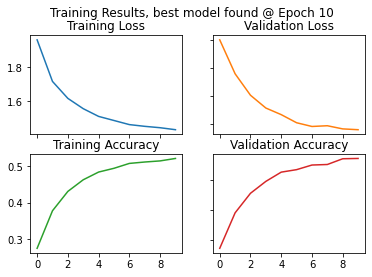

In [12]:
plot_results(s100s)

In [13]:
# Loading best model found:

best_model = Net.load_model("model/" + s100.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

-------------------------------------------
Accuracy on train data: 64.33%
Total Count:  40000
Total Match:  25732
-------------------------------------------
Test Accuracy of	0: 69.31% (2814/4060)
Test Accuracy of	1: 47.94% (1922/4009)
Test Accuracy of	2: 50.74% (2023/3987)
Test Accuracy of	3: 54.09% (2154/3982)
Test Accuracy of	4: 42.98% (1723/4009)
Test Accuracy of	5: 79.04% (3171/4012)
Test Accuracy of	6: 75.25% (2982/3963)
Test Accuracy of	7: 78.22% (3149/4026)
Test Accuracy of	8: 77.86% (3077/3952)
Test Accuracy of	9: 67.92% (2717/4000)
-------------------------------------------
Accuracy on valid data: 53.76%
Total Count:  10000
Total Match:  5376
-------------------------------------------
Test Accuracy of	0: 58.19% (547/940)
Test Accuracy of	1: 37.44% (371/991)
Test Accuracy of	2: 40.57% (411/1013)
Test Accuracy of	3: 44.60% (454/1018)
Test Accuracy of	4: 34.11% (338/991)
Test Accuracy of	5: 66.80% (660/988)
Test Accuracy of	6: 64.13% (665/1037)
Test Accuracy of	7: 69.51% (677

### Scenario B: lr x 10 ** -1

In [14]:
s01 = Net(
    optimizer = Adam(
        learning_rate = 0.0001  
    ),
    criterion = CrossEntropyLoss(),
    batch_norm = True,
    L2_reg_term = 0.001
)

s01.add(Linear(128, 1024, dropout=0.4))
s01.add(ReLU())
s01.add(Linear(1024, 512, dropout=0.2))
s01.add(ReLU())
s01.add(Linear(512, 64, dropout=0.2))
s01.add(ReLU())
s01.add(Linear(64, 16, dropout=0.2))
s01.add(ReLU())
s01.add(Linear(16, 10))  


s01.set_name("Adam_network_01")
print(f"{s01.model_name} is initialized and ready to be trained.")

Adam_network_01 is initialized and ready to be trained.


## Train and Evaluate Scenario C

In [15]:
s01s = s01.train_convergence(
    train_set = train_set,
    valid_set = valid_set,
    batch_size = 500,
    planned_epochs = 100,
    last_check = 10,
    threshold = 1e-25,
    report_interval = 5
)

{"tags": ["hide-output"]}

  1%|█▍                                                                                                                                           | 1/100 [00:08<13:36,  8.24s/it]

Epoch: 0	Interval Time: 8.2 sec(s)	Training Loss: 2.629321		Training Accuracy: 0.118525
						Validation Loss:2.223344	Validation Accuracy: 0.190500


  6%|████████▍                                                                                                                                    | 6/100 [00:51<13:31,  8.64s/it]

Epoch: 5	Interval Time: 43.0 sec(s)	Training Loss: 2.075981		Training Accuracy: 0.273200
						Validation Loss:1.891878	Validation Accuracy: 0.371000


 11%|███████████████▍                                                                                                                            | 11/100 [01:32<11:57,  8.06s/it]

Epoch: 10	Interval Time: 41.4 sec(s)	Training Loss: 1.923446		Training Accuracy: 0.327050
						Validation Loss:1.771536	Validation Accuracy: 0.414600


 16%|██████████████████████▍                                                                                                                     | 16/100 [02:06<09:51,  7.04s/it]

Epoch: 15	Interval Time: 34.2 sec(s)	Training Loss: 1.826462		Training Accuracy: 0.362075
						Validation Loss:1.697569	Validation Accuracy: 0.435200


 21%|█████████████████████████████▍                                                                                                              | 21/100 [02:41<09:08,  6.94s/it]

Epoch: 20	Interval Time: 34.6 sec(s)	Training Loss: 1.757923		Training Accuracy: 0.391750
						Validation Loss:1.648862	Validation Accuracy: 0.453500


 26%|████████████████████████████████████▍                                                                                                       | 26/100 [03:15<08:29,  6.88s/it]

Epoch: 25	Interval Time: 34.3 sec(s)	Training Loss: 1.710663		Training Accuracy: 0.408800
						Validation Loss:1.603429	Validation Accuracy: 0.465600


 31%|███████████████████████████████████████████▍                                                                                                | 31/100 [03:49<07:52,  6.85s/it]

Epoch: 30	Interval Time: 34.3 sec(s)	Training Loss: 1.661240		Training Accuracy: 0.427650
						Validation Loss:1.559893	Validation Accuracy: 0.480800


 36%|██████████████████████████████████████████████████▍                                                                                         | 36/100 [04:32<08:52,  8.32s/it]

Epoch: 35	Interval Time: 43.0 sec(s)	Training Loss: 1.614928		Training Accuracy: 0.449100
						Validation Loss:1.527219	Validation Accuracy: 0.496100


 41%|█████████████████████████████████████████████████████████▍                                                                                  | 41/100 [05:11<07:26,  7.56s/it]

Epoch: 40	Interval Time: 38.7 sec(s)	Training Loss: 1.577745		Training Accuracy: 0.466975
						Validation Loss:1.498428	Validation Accuracy: 0.507400


 46%|████████████████████████████████████████████████████████████████▍                                                                           | 46/100 [05:45<06:16,  6.97s/it]

Epoch: 45	Interval Time: 34.3 sec(s)	Training Loss: 1.550696		Training Accuracy: 0.475700
						Validation Loss:1.468736	Validation Accuracy: 0.515100


 51%|███████████████████████████████████████████████████████████████████████▍                                                                    | 51/100 [06:20<05:36,  6.88s/it]

Epoch: 50	Interval Time: 34.3 sec(s)	Training Loss: 1.513837		Training Accuracy: 0.492675
						Validation Loss:1.446682	Validation Accuracy: 0.523300


 55%|█████████████████████████████████████████████████████████████████████████████                                                               | 55/100 [06:54<05:39,  7.54s/it]

Epoch: 55	Interval Time: 34.3 sec(s)	Training Loss: 1.488860		Training Accuracy: 0.505650
						Validation Loss:1.424319	Validation Accuracy: 0.533100


Minimum percent change (1e-25%) in training loss not exceeded.

Convergence criteria achieved.
Training completed @ Epoch 55.
Total training time: 6 min 54.4 s

                Best model found @ Epoch 55
                --------------------------------------------
                Training Loss: 1.488860
                Validation Loss: 1.424319
                --------------------------------------------
                Training Accuracy: 0.505650
                Validation Accuracy: 0.533100


Best model 'Adam_network_01' saved in 'model/' directory.


{'tags': ['hide-output']}

<Figure size 720x504 with 0 Axes>

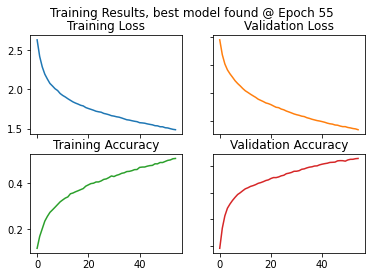

In [16]:
plot_results(s01s)

In [17]:
# Loading best model found:

best_model = Net.load_model("model/" + s01.model_name)
best_model.test_network(train_set, "train data")
best_model.test_network(valid_set, "valid data")
best_model.test_network(test_set, "test data")

-------------------------------------------
Accuracy on train data: 64.30%
Total Count:  40000
Total Match:  25718
-------------------------------------------
Test Accuracy of	0: 73.45% (2982/4060)
Test Accuracy of	1: 50.71% (2033/4009)
Test Accuracy of	2: 44.02% (1755/3987)
Test Accuracy of	3: 57.36% (2284/3982)
Test Accuracy of	4: 50.84% (2038/4009)
Test Accuracy of	5: 81.33% (3263/4012)
Test Accuracy of	6: 69.19% (2742/3963)
Test Accuracy of	7: 79.16% (3187/4026)
Test Accuracy of	8: 72.72% (2874/3952)
Test Accuracy of	9: 64.00% (2560/4000)
-------------------------------------------
Accuracy on valid data: 53.31%
Total Count:  10000
Total Match:  5331
-------------------------------------------
Test Accuracy of	0: 64.57% (607/940)
Test Accuracy of	1: 41.37% (410/991)
Test Accuracy of	2: 30.31% (307/1013)
Test Accuracy of	3: 45.78% (466/1018)
Test Accuracy of	4: 39.15% (388/991)
Test Accuracy of	5: 66.60% (658/988)
Test Accuracy of	6: 59.98% (622/1037)
Test Accuracy of	7: 72.69% (708